In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [46]:
campaign_df = pd.read_csv("bank-full.csv")
campaign_df.shape


(45211, 17)

In [45]:
campaign_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [4]:
campaign_df.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [7]:
#Lets analysze the distribution of the various attributes
campaign_df.describe().transpose()


count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [9]:
#There are no missing values for the data
#Average yearly balance should not be negative. Need more clarity on this data
# Age of the person,campaign, previous is normally distributed
# Mean of balance,day,duration,pdays is highly skewed to right because of an outlier 
# pdays data is highly imbalanced because of -1 value
# day ,month can be dropped


In [10]:
#Converting catagorical value to numeric value
campaign_df_Prep = campaign_df.drop(columns = ['day','month'])
#campaign_df = pd.get_dummies(campaign_df, columns=[''])

In [17]:
campaign_df_Prep = pd.get_dummies(campaign_df_Prep, columns=['job','marital','education','housing','default','loan','contact','poutcome'])

In [21]:
campaign_df_Prep.head()

age  balance  duration  campaign  pdays  previous Target  job_admin.  \
0   58     2143       261         1     -1         0     no           0   
1   44       29       151         1     -1         0     no           0   
2   33        2        76         1     -1         0     no           0   
3   47     1506        92         1     -1         0     no           0   
4   33        1       198         1     -1         0     no           0   

   job_blue-collar  job_entrepreneur  ...  default_yes  loan_no  loan_yes  \
0                0                 0  ...            0        1         0   
1                0                 0  ...            0        1         0   
2                0                 1  ...            0        0         1   
3                1                 0  ...            0        1         0   
4                0                 0  ...            0        1         0   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0                 0                  0                1                 0   
1                 0                  0                1                 0   
2                 0                  0                1                 0   
3                 0                  0                1                 0   
4                 0                  0                1                 0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  

[5 rows x 39 columns]

In [23]:
campaign_df_Prep.groupby(["Target"]).count()

age  balance  duration  campaign  pdays  previous  job_admin.  \
Target                                                                    
no      39922    39922     39922     39922  39922     39922       39922   
yes      5289     5289      5289      5289   5289      5289        5289   

        job_blue-collar  job_entrepreneur  job_housemaid  ...  default_yes  \
Target                                                    ...                
no                39922             39922          39922  ...        39922   
yes                5289              5289           5289  ...         5289   

        loan_no  loan_yes  contact_cellular  contact_telephone  \
Target                                                           
no        39922     39922             39922              39922   
yes        5289      5289              5289               5289   

        contact_unknown  poutcome_failure  poutcome_other  poutcome_success  \
Target                                                                        
no                39922             39922           39922             39922   
yes                5289              5289            5289              5289   

        poutcome_unknown  
Target                    
no                 39922  
yes                 5289  

[2 rows x 38 columns]

In [25]:
# The data is highly imbalanced for the class 

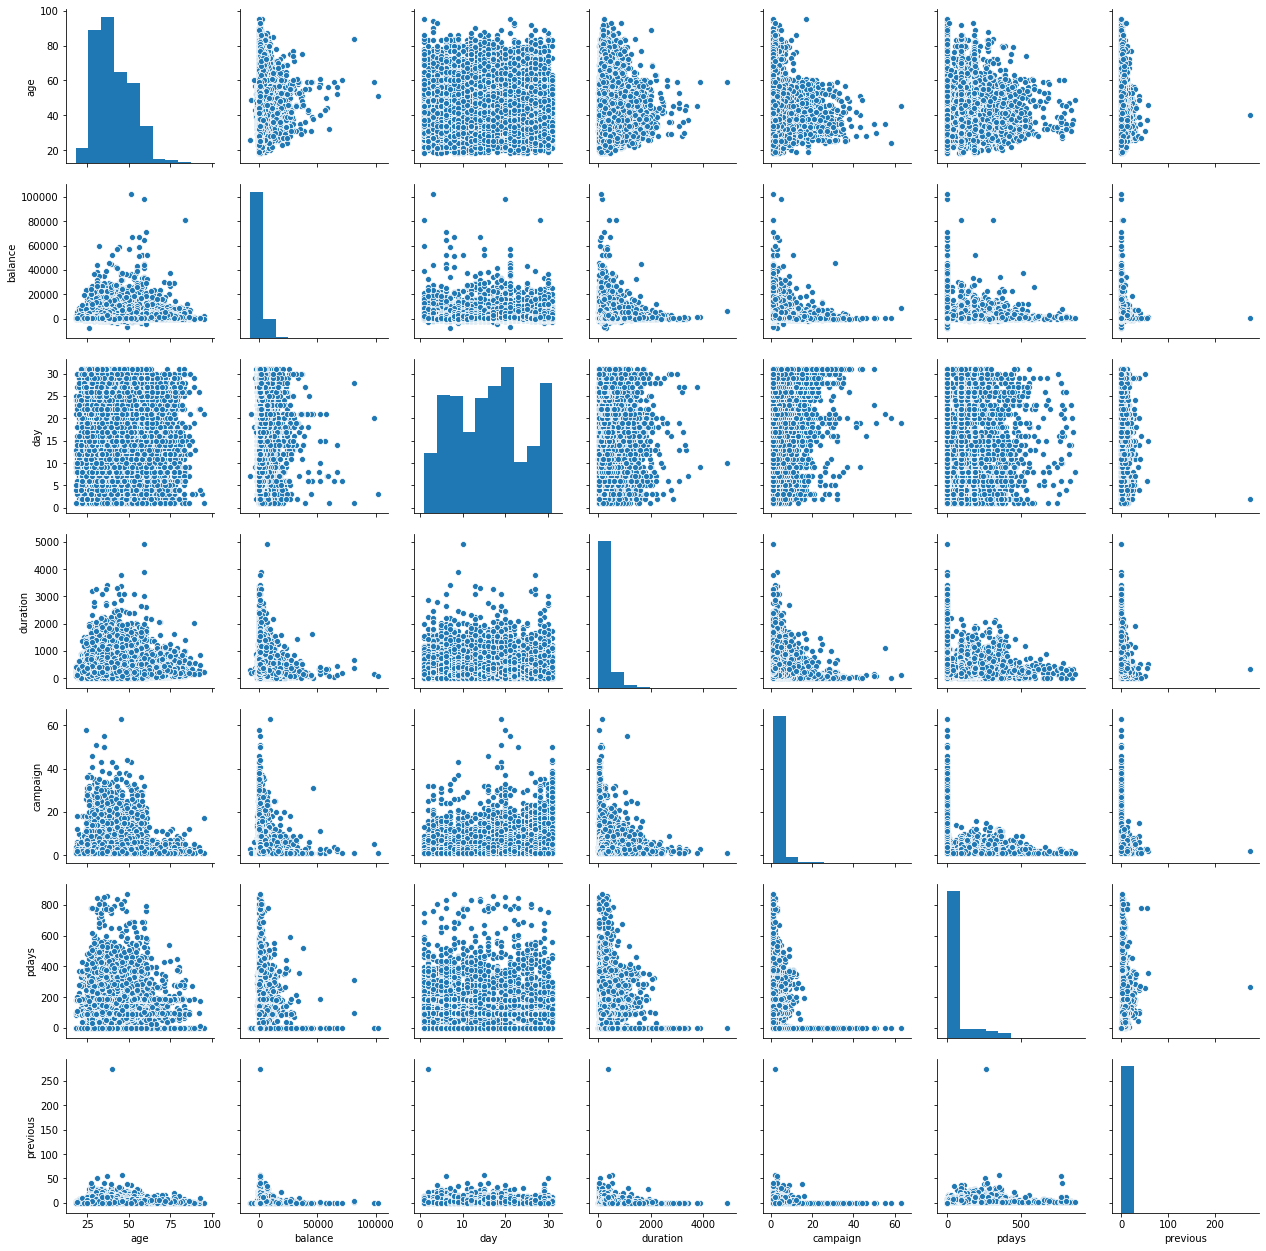

In [26]:
sns.pairplot(campaign_df)

In [27]:
#There is no linear relationship between any attributes
#The target column value has to be replaced by int valueX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [41]:

campaign_df_Prep['Target'] = campaign_df_Prep['Target'].replace("yes" , 1)
campaign_df_Prep['Target'] = campaign_df_Prep['Target'].replace("no" , 0)
X, y = campaign_df_Prep.drop(columns = ['Target']), campaign_df_Prep.loc[:,'Target'] 


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
expected = y_test

In [52]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)



coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

C:\Users\vinemade\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


          0         1         2         3         4         5         6  \
0 -0.003268  0.000021  0.004125 -0.104976 -0.000522  0.012903  0.103031   

          7         8         9  ...        29        30        31        32  \
0 -0.355938 -0.258325 -0.190645  ... -0.036693 -0.664268  0.172773  0.122968   

         33       34        35        36        37  intercept  
0 -0.996702 -0.68603 -0.362087  1.481237 -1.134081  -0.700961  

[1 rows x 39 columns]


In [55]:
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.9019463285166618
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12013
           1       0.64      0.33      0.43      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564

[[11726   287]
 [ 1043   508]]


In [56]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     12013
           1       0.34      0.56      0.42      1551

    accuracy                           0.82     13564
   macro avg       0.64      0.71      0.66     13564
weighted avg       0.87      0.82      0.84     13564

[[10300  1713]
 [  685   866]]


In [57]:
from scipy.stats import zscore

In [58]:
#Normalizing the data for z score
X, y = campaign_df_Prep.drop(columns = ['Target']), campaign_df_Prep.loc[:,'Target'] 
X_z = X.apply(zscore)
X_train, X_test, y_train, y_test = train_test_split(X_z, y, test_size = 0.3, random_state = 1)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [60]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [61]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8927307578885284

In [62]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted_labels))
print(metrics.confusion_matrix(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     12013
           1       0.55      0.34      0.42      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.65      0.68     13564
weighted avg       0.88      0.89      0.88     13564

[[11587   426]
 [ 1029   522]]


In [63]:
#Observations on Model
# Precision and Recall for class 0 is better for all the models as the number of samples are more in Class0
# For KNN the precision for class 1 is better than any other algorithm , but recall for logistic 
# regression is better than KNN
# Since there are more categorical variables KNN has performed better
# Some independent varibles are not linearly related to the dependent variables so Logistic regression
# has not performed well.

In [74]:
#Ensemble Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [75]:
#decision tree
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [76]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [77]:
model_entropy.score(X_test, y_test)  # performance on test data

0.8629460336184016

In [78]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [79]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [82]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.9014302565614863
0.8997693304262647


In [83]:
acc_DT = accuracy_score(y_test, preds_pruned)

In [86]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

xvar = campaign_df.drop('Target', axis=1)
feature_cols = xvar.columns

feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
marital    0.692217
age        0.000000
job        0.000000
education  0.000000
default    0.000000
balance    0.000000
housing    0.000000
loan       0.000000
contact    0.000000
day        0.000000
month      0.000000
duration   0.000000
campaign   0.000000
pdays      0.000000
previous   0.000000
poutcome   0.000000

In [87]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree   0.90143

In [88]:
#DEcison tree accurracy is highest.Then Logistic Regression accuracy is better.

In [89]:
#Apply the Random forest model and print the accuracy of Random forest Model

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [91]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [92]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

Method  accuracy
0  Decision Tree  0.901430
0  Random Forest  0.900177

In [93]:
#Compared to the decision tree, we can see that the accuracy has little reduced for the Random forest model

In [94]:
#Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [95]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [96]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [97]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

Method  accuracy
0  Decision Tree  0.901430
0  Random Forest  0.900177
0       Adaboost  0.898702

In [98]:
#Adaboost classifier performs worse than Decision tree and  Random forest

In [99]:
#Apply Bagging Classifier Algorithm and print the accuracy.

In [100]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [101]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [102]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

Method  accuracy
0  Decision Tree  0.901430
0  Random Forest  0.900177
0       Adaboost  0.898702
0        Bagging  0.898408

In [103]:
# Apply GradientBoost Classifier Algorithm for the same data and print the accuracy


In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [105]:
pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [106]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf
resultsDf

Method  accuracy
0   Decision Tree  0.901430
0   Random Forest  0.900177
0        Adaboost  0.898702
0         Bagging  0.898408
0  Gradient Boost  0.903568

In [107]:
# Out of all methods Gradient Boost Trees have performed the best of all the models

In [ ]:
#Observations on Classificat Model
# Precision and Recall for class 0 is better for all the models as the number of samples are more in Class0
# For KNN the precision for class 1 is better than any other algorithm , but recall for logistic 
# regression is better than KNN
# Since there are more categorical variables KNN has performed better
# Some independent varibles are not linearly related to the dependent variables so Logistic regression
# has not performed well.